# Importing Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV

In [2]:
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
data.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


#  Exploratory Data Analysis

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
print(data.duplicated().sum())
print("---------------------")
print(data.isna().sum())


0
---------------------
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [7]:
data.shape

(7043, 21)

In [8]:
data['TotalCharges'] = pd.to_numeric(data.TotalCharges, errors='coerce')

In [9]:
data.loc[data['TotalCharges'].isna(),'TotalCharges']=data['tenure']*data['MonthlyCharges']

In [10]:
data['SeniorCitizen']=data['SeniorCitizen'].map({0:'No',1:'Yes'})

In [11]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.50,70.35,89.85,118.75
TotalCharges,7043.0,2279.734304,2266.794470,0.00,398.55,1394.55,3786.60,8684.80


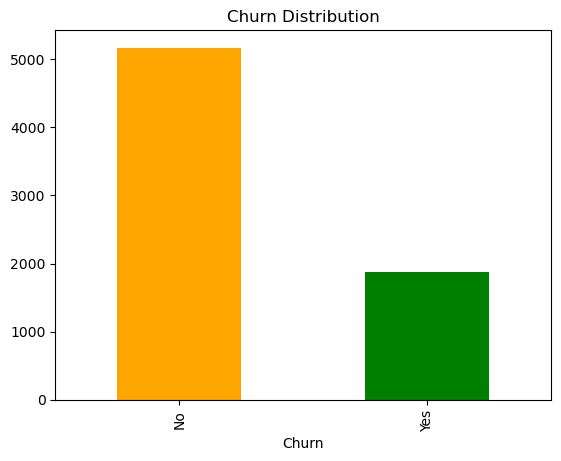

In [12]:
import matplotlib.pyplot as plt # importing the pyplot module from matplotlib
import pandas as pd

colors=['orange' if churn=='No'else 'green' for churn in data['Churn'].unique()]
data['Churn'].value_counts().plot(kind='bar', color=colors)

plt.title('Churn Distribution') # calling title() function on the plt object
plt.show()

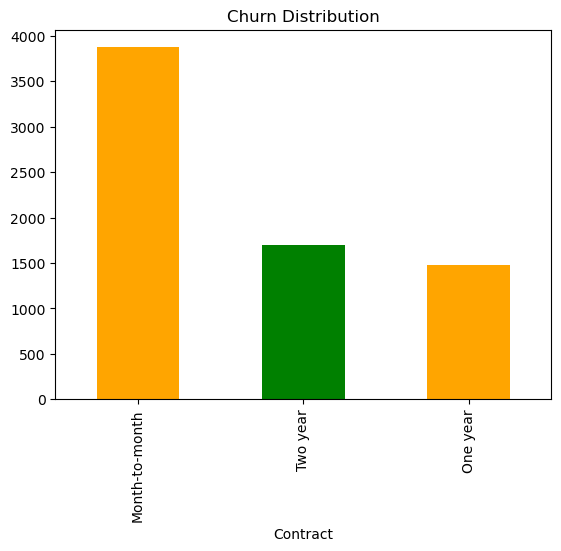

In [13]:
data['Contract'].value_counts().plot(kind='bar', color=colors)

plt.title('Churn Distribution')
plt.show()

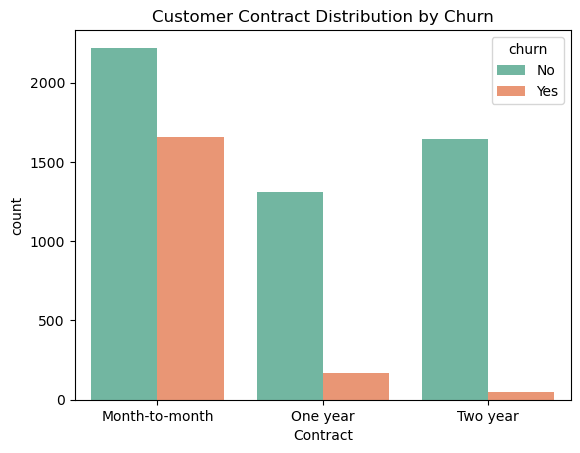

In [14]:
sns.countplot(data=data, x='Contract', hue ='Churn', palette ='Set2')
plt.title('Customer Contract Distribution by Churn')
plt.legend(title='churn', loc='upper right')
plt.show()

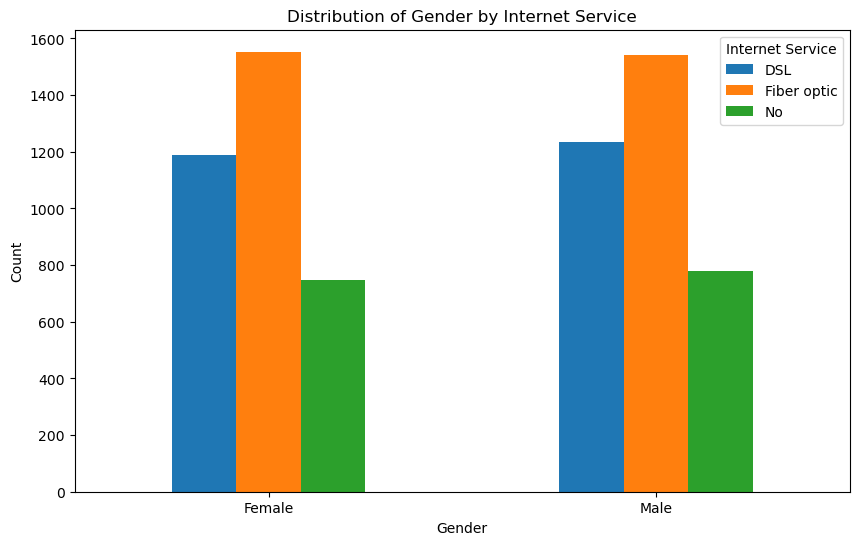

In [15]:
# Relation gender and InternetService
counts = data.groupby(['gender', 'InternetService']).size().unstack(fill_value=0)

# Plotting the grouped bar chart
counts.plot(kind='bar', figsize=(10, 6))

# Add labels and title
plt.title('Distribution of Gender by Internet Service')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Keep x-axis labels horizontal
plt.legend(title='Internet Service', loc='upper right')

# Show the plot
plt.show()

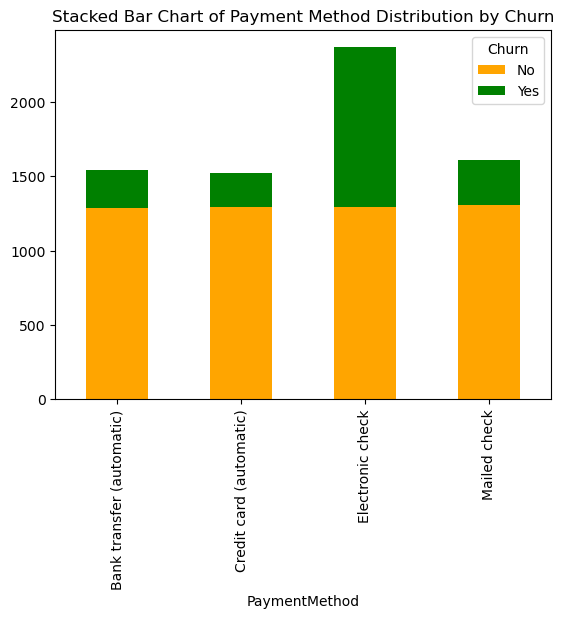

In [16]:
#  payment methods by churn
payment_churn_counts = data.groupby(['PaymentMethod', 'Churn']).size().unstack()

# Plotting the stacked bar chart
payment_churn_counts.plot(kind='bar', stacked=True, color=['orange', 'green'])

# Add labels and title
plt.title('Stacked Bar Chart of Payment Method Distribution by Churn')

plt.legend(title='Churn', labels=['No', 'Yes'], loc='upper right')

# Show the plot
plt.show()

Text(0.5, 1.0, 'Payment Method Distribution')

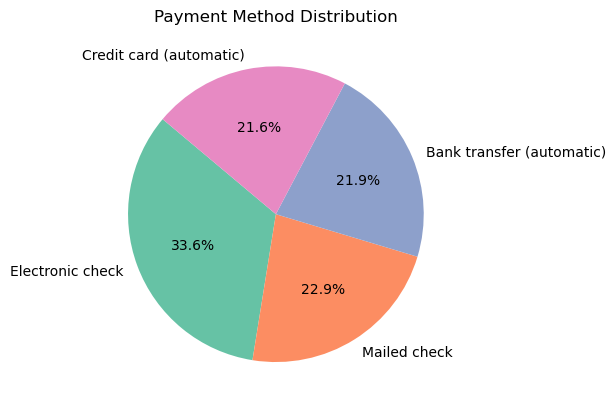

In [17]:
payment_distribution = data['PaymentMethod'].value_counts()
plt.pie(payment_distribution, labels=payment_distribution.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set2'))

# Add a title
plt.title('Payment Method Distribution')

Text(0.5, 1.0, 'Gender Distribution')

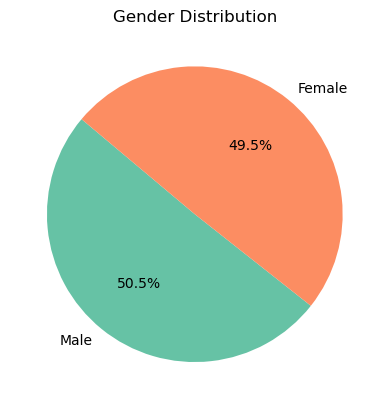

In [18]:
gender_distribution = data['gender'].value_counts()
plt.pie(gender_distribution, labels=gender_distribution.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set2'))

# Add a title
plt.title('Gender Distribution')

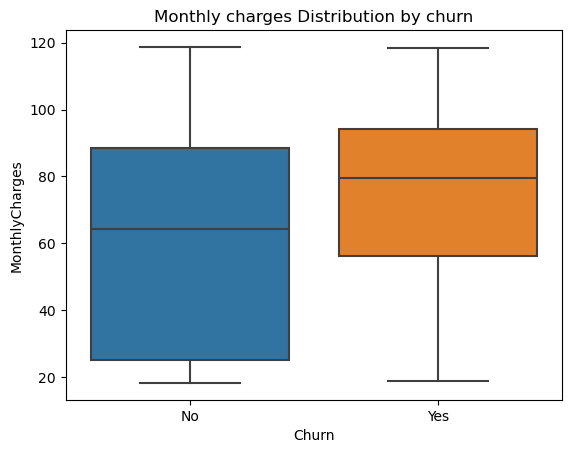

In [19]:
sns.boxplot(x='Churn',y='MonthlyCharges', data=data)
plt.title('Monthly charges Distribution by churn')
plt.show()

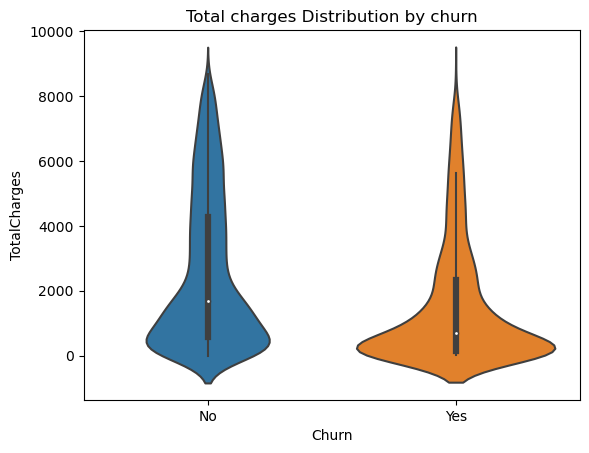

In [20]:
sns.violinplot(x='Churn',y='TotalCharges', data=data)
plt.title('Total charges Distribution by churn')
plt.show()

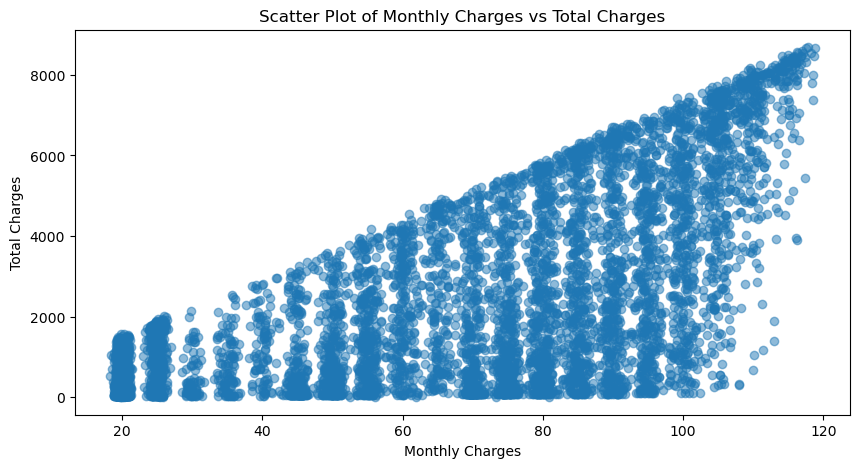

In [21]:
plt.figure(figsize=(10, 5))
plt.scatter(data['MonthlyCharges'], data['TotalCharges'], alpha=0.5)
plt.title('Scatter Plot of Monthly Charges vs Total Charges')
plt.xlabel('Monthly Charges')
plt.ylabel('Total Charges')
plt.show()

#  Machine Learning




In [22]:
x = data.drop(['Churn', 'customerID'], axis=1)
y = data['Churn']
x = pd.get_dummies(x, drop_first=True)
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [23]:
#logistic regression
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

lr=LogisticRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy*100)


Accuracy: 82.11497515968772


In [24]:
lr = LogisticRegression(max_iter=1000)
# Train and evaluate the model using cross-validation
cv_scores = cross_val_score(lr, x, y, cv=5, scoring='accuracy')
print(f"Logistic Regression - Cross-Validation Accuracy: {cv_scores.mean():.2f}")

Logistic Regression - Cross-Validation Accuracy: 0.80


In [25]:
# Evaluate the model using performance metrics
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.2f}")
report = classification_report(y_test, y_pred, target_names=['No Churn', 'Churn'])
print("Classification Report:\n", report)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Test Accuracy: 0.82
Classification Report:
               precision    recall  f1-score   support

    No Churn       0.86      0.90      0.88      1036
       Churn       0.69      0.60      0.64       373

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.82      0.82      0.82      1409

Confusion Matrix:
 [[934 102]
 [150 223]]


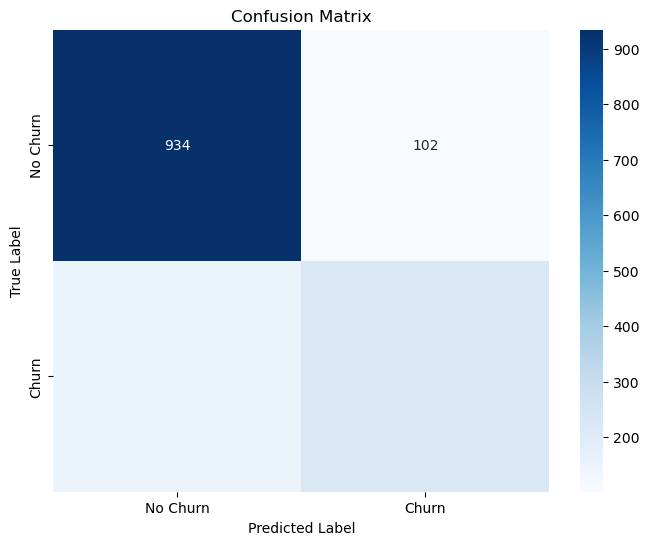

In [26]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Churn', 'Churn'],
            yticklabels=['No Churn', 'Churn'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [27]:
# Hyperparameter tuning for Logistic Regression
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    'penalty': ['l1', 'l2'],        # Regularization type
    'solver': ['liblinear']         # Solver for small datasets
}
grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

# Best parameters and score
print(f"Best parameters for Logistic Regression: {grid_search.best_params_}")
print(f"Best cross-validated accuracy: {grid_search.best_score_:.2f}")


Best parameters for Logistic Regression: {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Best cross-validated accuracy: 0.80


In [28]:
# Evaluate the best Logistic Regression model
best_lr = grid_search.best_estimator_
y_pred_best = best_lr.predict(x_test)

# Final performance metrics
print(f"Optimized Logistic Regression - Test Accuracy: {accuracy_score(y_test, y_pred_best):.2f}")
print(classification_report(y_test, y_pred_best))
print(confusion_matrix(y_test, y_pred_best))

Optimized Logistic Regression - Test Accuracy: 0.82
              precision    recall  f1-score   support

          No       0.86      0.90      0.88      1036
         Yes       0.68      0.59      0.63       373

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.81      0.82      0.81      1409

[[933 103]
 [152 221]]


c:\Users\drago\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


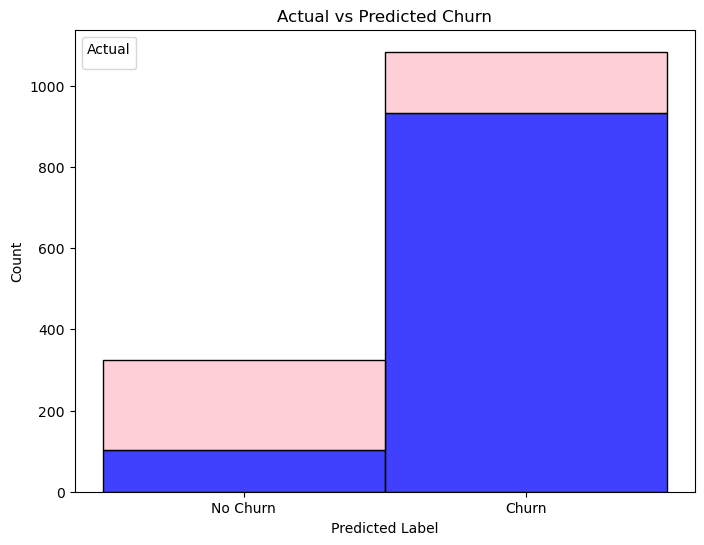

In [29]:
# Plotting actual vs predicted
plt.figure(figsize=(8, 6))
sns.histplot(
    data=pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}),
    x='Predicted',
    hue='Actual',
    multiple='stack',
    bins=2,
    palette={'Yes': 'pink', 'No': 'blue'}
)
plt.title('Actual vs Predicted Churn')
plt.xlabel('Predicted Label')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No Churn', 'Churn'])
plt.legend(title='Actual')
plt.show()

## MlOps Implementation 

#### Objective: 
 - Implement MLOps tools to manage, track, and automate your machine learning pipeline.
#### Tools: 
 - MLflow

In [30]:
#pip install mlflow

In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import mlflow
import mlflow.sklearn
mlflow.end_run()
# Load the data
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Prepare features and target
x = data.drop(['Churn', 'customerID'], axis=1)
y = data['Churn']
x = pd.get_dummies(x, drop_first=True)
scaler = StandardScaler()
x = scaler.fit_transform(x)

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Initialize MLflow experiment
mlflow.start_run()

# Log data prep parameters
mlflow.log_param('test_size', 0.2)
mlflow.log_param('random_state', 42)

# Train logistic regression model
lr = LogisticRegression(max_iter=1000)
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

# Evaluate and log accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}%")
mlflow.log_metric('accuracy', accuracy)

# Cross-validation
cv_scores = cross_val_score(lr, x, y, cv=5, scoring='accuracy')
print(f"Logistic Regression - Cross-Validation Accuracy: {cv_scores.mean():.2f}")
mlflow.log_metric('cv_accuracy', cv_scores.mean())

# Log classification report and confusion matrix
report = classification_report(y_test, y_pred, target_names=['No Churn', 'Churn'])
print("Classification Report:\n", report)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    'penalty': ['l1', 'l2'],        # Regularization type
    'solver': ['liblinear']         # Solver for small datasets
}
grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

# Log best hyperparameters
mlflow.log_param('best_C', grid_search.best_params_['C'])
mlflow.log_param('best_penalty', grid_search.best_params_['penalty'])

# Best Logistic Regression model evaluation
best_lr = grid_search.best_estimator_
y_pred_best = best_lr.predict(x_test)
final_accuracy = accuracy_score(y_test, y_pred_best)

print(f"Optimized Logistic Regression - Test Accuracy: {final_accuracy:.2f}")
print(classification_report(y_test, y_pred_best))
print(confusion_matrix(y_test, y_pred_best))

# Log final accuracy and confusion matrix
mlflow.log_metric('final_accuracy', final_accuracy)
mlflow.log_artifact('confusion_matrix.txt')

# End MLflow run
mlflow.end_run()


' import pandas as pd\nfrom sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV\nfrom sklearn.preprocessing import StandardScaler\nfrom sklearn.linear_model import LogisticRegression\nfrom sklearn.metrics import accuracy_score, classification_report, confusion_matrix\nimport mlflow\nimport mlflow.sklearn\nmlflow.end_run()\n# Load the data\ndata = pd.read_csv(\'WA_Fn-UseC_-Telco-Customer-Churn.csv\')\n\n# Prepare features and target\nx = data.drop([\'Churn\', \'customerID\'], axis=1)\ny = data[\'Churn\']\nx = pd.get_dummies(x, drop_first=True)\nscaler = StandardScaler()\nx = scaler.fit_transform(x)\n\n# Split the data into training and test sets\nx_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)\n\n# Initialize MLflow experiment\nmlflow.start_run()\n\n# Log data prep parameters\nmlflow.log_param(\'test_size\', 0.2)\nmlflow.log_param(\'random_state\', 42)\n\n# Train logistic regression model\nlr = LogisticRegression(max_i

In [32]:
#!mlflow ui

## Model Deployment

#### Objective: 
Deploy the trained model either to the cloud or create a web application for predictions.
#### Tools:
 - Hugging Face for model sharing and hosting (if applicable).
 - Cloud Platforms (AWS, Azure) or Flask/Streamlit for a local web app.

In [33]:
#pip install streamlit

In [34]:
streamlit_code = """

import streamlit as st
import numpy as np
import mlflow.sklearn
import pandas as pd

# Load the model from MLflow (replace with the correct model version)
model = mlflow.sklearn.load_model(model_uri="models:/Customer_Churn_Prediction/1")

# Streamlit app
st.title("Customer Churn Prediction")

# Collect customer details from user input
st.write("Please input the customer's information:")

# Input fields matching the features used in your model
tenure = st.number_input('Tenure (in months)', min_value=0, max_value=72, value=1)
monthly_charges = st.number_input('Monthly Charges', min_value=0.0, max_value=200.0, value=0.0)
total_charges = st.number_input('Total Charges', min_value=0.0, value=0.0)
senior_citizen = st.selectbox('Is the customer a senior citizen?', ['No', 'Yes'])
contract = st.selectbox('Contract Type', ['Month-to-month', 'One year', 'Two year'])
gender = st.selectbox('Gender', ['Male', 'Female'])
dependents = st.selectbox('Has dependents?', ['No', 'Yes'])
partner = st.selectbox('Has a partner?', ['No', 'Yes'])
phone_service = st.selectbox('Has phone service?', ['No', 'Yes'])
multiple_lines = st.selectbox('Multiple lines?', ['No', 'Yes', 'No phone service'])
internet_service = st.selectbox('Internet service type?', ['DSL', 'Fiber optic', 'No'])
online_security = st.selectbox('Has online security?', ['No', 'Yes', 'No internet service'])
online_backup = st.selectbox('Has online backup?', ['No', 'Yes', 'No internet service'])
device_protection = st.selectbox('Has device protection?', ['No', 'Yes', 'No internet service'])
tech_support = st.selectbox('Has tech support?', ['No', 'Yes', 'No internet service'])
streaming_tv = st.selectbox('Has streaming TV?', ['No', 'Yes', 'No internet service'])
streaming_movies = st.selectbox('Has streaming movies?', ['No', 'Yes', 'No internet service'])
paperless_billing = st.selectbox('Uses paperless billing?', ['No', 'Yes'])
payment_method = st.selectbox('Payment Method', ['Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)'])

# One-hot encoding for categorical features (like contract, payment method, etc.)
contract_onehot = pd.get_dummies(contract, prefix='Contract')
payment_method_onehot = pd.get_dummies(payment_method, prefix='PaymentMethod')

# Map categorical variables (binary mappings)
senior_citizen = 1 if senior_citizen == 'Yes' else 0
gender = 1 if gender == 'Male' else 0
partner = 1 if partner == 'Yes' else 0
dependents = 1 if dependents == 'Yes' else 0
paperless_billing = 1 if paperless_billing == 'Yes' else 0

# Convert other Yes/No inputs into numeric (1/0)
features_binary = {
    "PhoneService": 1 if phone_service == 'Yes' else 0,
    "MultipleLines": 1 if multiple_lines == 'Yes' else 0,
    "InternetService": 1 if internet_service != 'No' else 0,  # Add this line
    "OnlineSecurity": 1 if online_security == 'Yes' else 0,
    "OnlineBackup": 1 if online_backup == 'Yes' else 0,
    "DeviceProtection": 1 if device_protection == 'Yes' else 0,
    "TechSupport": 1 if tech_support == 'Yes' else 0,
    "StreamingTV": 1 if streaming_tv == 'Yes' else 0,
    "StreamingMovies": 1 if streaming_movies == 'Yes' else 0
}

# Prepare the feature array (this should match the feature order used during training)
features = []

# Numeric features
features.extend([tenure, monthly_charges, total_charges])

# Binary features
binary_features = [
    senior_citizen, 
    gender, 
    partner, 
    dependents,
    features_binary['PhoneService'],
    features_binary['MultipleLines'],
    features_binary['InternetService'],
    features_binary['OnlineSecurity'], 
    features_binary['OnlineBackup'],
    features_binary['DeviceProtection'], 
    features_binary['TechSupport'],
    features_binary['StreamingTV'], 
    features_binary['StreamingMovies'],
    paperless_billing
]
features.extend(binary_features)

# Categorical features (one-hot encoded)
# Internet Service (3 features)
features.extend([
    1 if internet_service == 'DSL' else 0,
    1 if internet_service == 'Fiber optic' else 0,
    1 if internet_service == 'No' else 0
])

# Contract (3 features)
features.extend([
    1 if contract == 'Month-to-month' else 0,
    1 if contract == 'One year' else 0,
    1 if contract == 'Two year' else 0
])

# Payment Method (4 features)
features.extend([
    1 if payment_method == 'Electronic check' else 0,
    1 if payment_method == 'Mailed check' else 0,
    1 if payment_method == 'Bank transfer (automatic)' else 0,
    1 if payment_method == 'Credit card (automatic)' else 0
])

# Multiple Lines (3 features)
features.extend([
    1 if multiple_lines == 'No' else 0,
    1 if multiple_lines == 'Yes' else 0,
    1 if multiple_lines == 'No phone service' else 0
])

# Convert to numpy array
features = np.array(features).reshape(1, -1)

# Print the number of features for debugging
print(f"Number of features: {features.shape[1]}")

# Ensure the number of features matches your model's input
if st.button('Predict'):
    try:
        # Make the prediction
        prediction = model.predict(features)
        
        # Display the prediction result
        if prediction[0] == 1:
            st.write("The customer is likely to churn.")
        else:
            st.write("The customer is not likely to churn.")
    except Exception as e:
        st.write(f"Error: {e}")
        st.write(f"Number of features: {features.shape[1]}")

"""

# Write the Streamlit code to a Python script
with open('Customer_Churn_Prediction.py', 'w') as f:
    f.write(streamlit_code)

print("Streamlit code saved to 'Customer_Churn_Prediction.py'")

Streamlit code saved to 'Customer_Churn_Prediction.py'


In [36]:
!streamlit run Customer_Churn_Prediction.py


^C


#### Deployment